## Loading of Steinmetz data

includes some visualizations

**PCA ON LFP DATA**

In [1]:
import os, requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import glob

## Defaults
data_path = './pickled_data/'
plot_path = './plots/'
os.makedirs(data_path, exist_ok=True)
os.makedirs(plot_path, exist_ok=True)

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
fname.append('steinmetz_st.npz')
fname.append('steinmetz_WAV.npz')
fname.append('steinmetz_lfp.npz')
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")
url.append("https://osf.io/4bjns/download")
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")
for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


alldat = np.array([])
for j in range(3):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx.
for name in fname[3:]:
    holder = np.load(name, allow_pickle=True)['dat']
    keys = holder[0].keys()
    for i in range(len(alldat)):
        for key in keys:
            alldat[i][key] = holder[i][key]


dat = alldat[11]
print(dat.keys())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive', 'ss', 'ss_passive', 'waveform_w', 'waveform_u', 'lfp', 'lfp_passive', 'brain_area_lfp'])


In [23]:
from sklearn.decomposition import PCA

n_components = 100
start = 50
end = 130
PCAs = []
data = []
areas = []
for i, dat in enumerate(alldat):
  #lfps = []

  n_trials = len(dat['lfp'][0])
  t_slice = 130 - 50
  n_areas = len(dat['brain_area_lfp'])

  lfp_array = np.zeros([n_trials, n_areas * t_slice])
  areas.append(dat['brain_area_lfp'])
  for j, area in enumerate(dat['brain_area_lfp']):

    for k, trial in enumerate(dat['lfp'][j][:, 50:130]):

      lfp = dat['lfp'][j][k, 50:130] 
      lfp = lfp - np.mean(lfp)

      lfp_array[k][j*t_slice:(j*t_slice)+t_slice] = lfp

  pca = PCA(n_components=n_components)
  pca.fit(np.asarray(lfp_array))

  PCAs.append(pca)
  data.append(lfp_array)


In [10]:
PCAs

[PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 PCA(copy=True, iterated

**PLOTS STOLEN FROM THE TUTORIAL NOTEBOOKS**

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [30]:
def visualize_components(component1, component2, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y


def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Vector of eigenvalues
    (numpy array of floats)    : Corresponding matrix of eigenvectors

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals


def plot_eigenvalues(evals, limit=True):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if limit:
    plt.show()

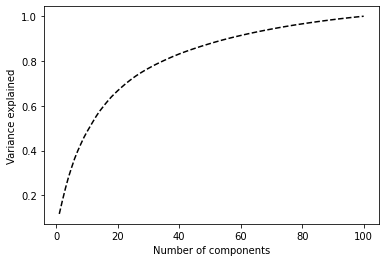

In [20]:
def get_variance_explained(evals):
  """
  Plots eigenvalues.
  Args:
    (numpy array of floats) : Vector of eigenvalues
  Returns:
    Nothing.
  """

  # cumulatively sum the eigenvalues
  csum = np.cumsum(evals)
  # normalize by the sum of eigenvalues
  variance_explained = csum / np.sum(evals)

  return variance_explained

evals = PCAs[0].explained_variance_
# calculate the variance explained
variance_explained = get_variance_explained(evals)

# Uncomment to plot the variance explained
plot_variance_explained(variance_explained)

In [11]:
dir(PCAs[0])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values

(0.0, 100.0)

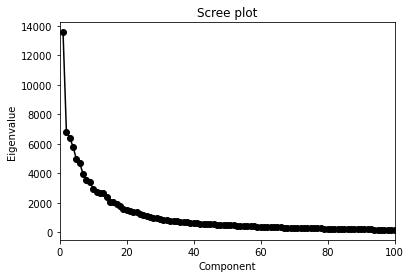

In [21]:
# perform PCA
#score, evectors, evals = pca(X)

# plot the eigenvalues

plot_eigenvalues(evals, limit=False)
plt.xlim([0, 100])  # limit x-axis up to 100 for zooming

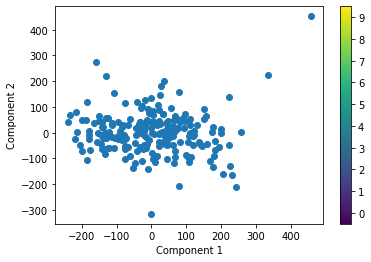

In [31]:
# Take only the first 2000 samples with the corresponding labels
#data, labels = X[:2000, :], labels[:2000]
# Perform PCA 
scores = PCAs[0].transform(data[0])
#PCAs = []
#data = []
#areas = []

labels = areas[0]
# Plot the data and reconstruction
visualize_components(scores[:, 0], scores[:, 1])

In [ ]:
# Take only the first 2000 samples with the corresponding labels
X, labels = X[:2000, :], labels[:2000]
# Perform PCA 
scores = pca_model.transform(X)

In [10]:
#for key in PCA_dicts[0]['ACA'].explained_variance_ratio_:
#  print(key)

#np.shape(PCA_dicts[0]['ACA'].components_)
#dir(PCA_dicts[0]['ACA'])

#PCAs
print(np.shape(brain_area_lfp))
np.shape(brain_area_lfp.flatten())

(214, 80)


(17120,)

In [ ]:
from scipy.stats import zscore

for i, exp in enumerate(PCA_dicts):
  
  for area in exp:

      pca = PCA_dicts[i][area]
      plt.close('all')
      fig, ax = plt.subplots(1,10, figsize=(100,10))
      
      pc1 = zscore(pca.components_)
      
      
      for j, component in enumerate(pca.components_):

        ax[j].plot(component)
plt.show()


In [34]:
from scipy.stats import zscore

for i, exp in enumerate(PCA_dicts):

  fig, ax = plt.subplots()
  pcs = []
  labels = []

  for area in exp:

    pca = PCA_dicts[i][area]
    plt.close('all')
      
    pc1 = zscore(pca.components_)
    pcs.append(pc1[0])
    labels.append(area)

  ax.imshow(pcs, aspect='auto', vmax=2, vmin = -2, cmap = 'hot')

  ax.set(xlabel = 'binned time', ylabel = 'Principal component')
  #ax.title('PC %d'%j)

plt.show()



NameError: ignored

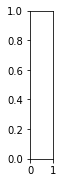

In [19]:
}plt.figure(figsize= (20, 6))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:269: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


IndexError: ignored

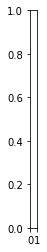

**OLD CODE**

In [ ]:
import os, requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import seaborn as sns
import pandas as pd
import glob

## Defaults
data_path = r'/Users/phillipsmg/Documents/science/neuromatch/' #/pickled_data/'
plot_path = r'/Users/phillipsmg/Documents/science/neuromatch/plots/'
os.makedirs(data_path, exist_ok=True)
os.makedirs(plot_path, exist_ok=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Data retrieval
import os, requests
import numpy as np
fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
#@title Data loading

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


**COPY OF ASHIMA'S CODE**

In [ ]:
data_path = './pickled_data/'
plot_path = './plots/'
os.makedirs(data_path, exist_ok=True)
os.makedirs(plot_path, exist_ok=True)
sns.set(context='poster', style='white', palette='muted')

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)



In [ ]:
alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


In [ ]:
test_df = pd.DataFrame(alldat)
test_df.to_pickle(f'{data_path}/test.pkl')

[{'ACA': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'CA3': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'DG': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'LS': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'MOs': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'SUB': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False),
  'VISp': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
      svd_solver='auto', tol=0.0, whiten=False)},
 {'CA1': PCA(copy=True, iterated_power='auto', n_components=10, random_state

In [ ]:
lfp_df = pd.DataFrame() 
#loop through all sessions
for session, data in enumerate(alldat):
    #loop through trial_data from all neurons
    for lfp_num, lfp_data in enumerate(data['lfp']):
#         print(neuron_data.shape)
        tmpdf = pd.DataFrame(lfp_data, columns=list(range(lfp_data.shape[1])))
        tmpdf['trial_num'] = tmpdf.index.values
        tmpdf['lfp_num'] = lfp_num
        tmpdf['lfp_location'] = data['brain_area_lfp'][lfp_num]
        tmpdf['session'] = session
        tmpdf['mouse_name'] = data['mouse_name']
        lfp_df = pd.concat([lfp_df, tmpdf], ignore_index=True)
#     if session !=0 and session%20 == 0:
#         lfp_df.to_pickle(f'{data_path}/mouse_data_lfp_{session//20}.pkl')
#         lfp_df = pd.DataFrame()
    else:
        continue
    
# lfp_df.to_pickle(f'{data_path}/mouse_data_lfp_2.pkl')
lfp_df.head()

KeyError: ignored

In [ ]:
data_path

os.getcwd()

pca on lfp, then do glm

'/content'

In [ ]:
spike_df = pd.DataFrame() 
#loop through all sessions
for session, data in enumerate(alldat):
    #loop through trial_data from all neurons
    print('Session:', session)
    for neuron_num, neuron_data in enumerate(data['spks']):

        tmpdf = pd.DataFrame(neuron_data, columns=list(range(neuron_data.shape[1])))
        tmpdf['trial_num'] = tmpdf.index.values
        tmpdf['neuron_num'] = neuron_num 
        tmpdf['neuron_location'] = data['brain_area'][neuron_num]
        tmpdf['session'] = session
        tmpdf['mouse_name'] = data['mouse_name']
        spike_df = pd.concat([spike_df, tmpdf], ignore_index=True)
    if session !=0 and session%10 == 0:
        spike_df.to_pickle(f'{data_path}/mouse_data_{session//10}.pkl')
        spike_df = pd.DataFrame()
    else:
        continue
    
spike_df.to_pickle(f'{data_path}/mouse_data_4.pkl')
spike_df.head()


Session: 0
Session: 1
Session: 2
Session: 3
Session: 4
Session: 5
Session: 6
Session: 7
Session: 8
Session: 9
Session: 10
Session: 11
Session: 12
Session: 13
Session: 14
Session: 15
Session: 16
Session: 17
Session: 18
Session: 19
Session: 20
Session: 21
Session: 22
Session: 23
Session: 24
Session: 25
Session: 26
Session: 27
Session: 28
Session: 29
Session: 30
Session: 31
Session: 32
Session: 33
Session: 34
Session: 35
Session: 36
Session: 37
Session: 38


0  1  2  3  4  ...  trial_num  neuron_num  neuron_location  session  mouse_name
0  0  0  0  0  0  ...          0           0              ORB       31    Richards
1  0  0  0  0  0  ...          1           0              ORB       31    Richards
2  0  0  0  0  0  ...          2           0              ORB       31    Richards
3  0  0  0  0  0  ...          3           0              ORB       31    Richards
4  0  0  0  0  0  ...          4           0              ORB       31    Richards

[5 rows x 255 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
spike_df = pd.concat([pd.read_pickle(fname) for fname in glob.glob(f'{data_path}/mouse_data_*')])
spike_df.set_index(['session', 'mouse_name','trial_num','neuron_num','neuron_location',])

ValueError: ignored

In [ ]:
#dat.keys()
#   len(dat['response'])
max_length = 0
tot_n_trials = 0
tot_n_neurons = 0
start_index = 50
end_index = 130

for j in range(len(fname)):
  dat = np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']
  for d in dat:
    n_neurons, n_trials = np.shape(d['spks'])[0], np.shape(d['spks'])[1]

    tot_n_neurons += n_neurons
    tot_n_trials += n_trials



In [ ]:
#spike_df.loc[:, '50':'130']
n_samples = 1000
n_total = 

neuron_locations = spike_df.neuron_location.unique().astype(list)
spike_df.iloc[np.random., 50:130]


#for i in spike_df:
#  print(type(i))

50     0
51     0
52     0
53     0
54     0
      ..
125    0
126    0
127    0
128    0
129    0
Name: 1, Length: 80, dtype: object

In [ ]:
n_samples = 1000
spk_dict = {}

for area in spike_df.neuron_location.unique().astype(list):

  area_df = spike_df[spike_df.neuron_location == area]

  indexes = np.random.choice(area_df.index, n_samples, replace=False)
  #print(indexes)
  samples_df = area_df[area_df.index.isin(indexes)]
  samples = samples_df.iloc[:,  50:130]

  spk_dict[area] = samples


In [ ]:
spk_dict

{'ACA':          50   51   52   53   54   55   56   ...  123  124  125  126  127  128  129
 2283       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 2541       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 2557       0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 15988      0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 15999      0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 1699676    0    0    0    0    0    0    0  ...    0    1    0    0    0    0    0
 1706835    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 1708255    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 1712486    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 1718044    0    0    0    0    1    0    0  ...    0    0    0    0 

In [ ]:
#for i, d in enumerate(alldat):

#spikes_array = np.zeros([tot_n_trials, tot_n_neurons, end_index - start_index])
spikes_array = np.array([])
for j in range(len(fname)):
  dat = np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']
  for d in dat:
    #spikes_array[i] = d['spks'][:,:,start_index:end_index]

    for i in d['spks'][:,:,start_index:end_index]:
      
      if len(spikes_array) == 0:
        spikes_array = i
      
      if len(spikes_array) != 0:
        spikes_array = np.hstack((spikes_array, i))

#np.shape(d['spks'][:,:,50:200])#[:,0])#[:,4,:]

ValueError: ignored

In [ ]:
np.shape(spikes_array), np.shape(i),

((214, 58800), (251, 80))

In [ ]:
if len(spikes_array) == :
  print('hello')

ValueError: ignored

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




In [ ]:
dat['gocue']

array([[0.48841865],
       [0.56171624],
       [0.6277027 ],
       [0.77353535],
       [0.61263709],
       [0.72839327],
       [0.77820739],
       [0.66233874],
       [0.63386641],
       [0.44806527],
       [0.72309279],
       [0.48826985],
       [0.56320355],
       [0.48741344],
       [0.40065609],
       [0.40867261],
       [0.40519758],
       [0.45826623],
       [0.61785096],
       [0.72780273],
       [0.6359332 ],
       [0.66807363],
       [0.66320184],
       [0.5058879 ],
       [0.76738597],
       [0.6770692 ],
       [0.62228154],
       [0.67822337],
       [0.59281896],
       [0.77301021],
       [0.76107631],
       [0.79780037],
       [0.42827087],
       [0.6431434 ],
       [0.71314721],
       [0.61172721],
       [0.76718867],
       [0.40236408],
       [0.45802182],
       [0.46126396],
       [0.63226761],
       [0.72263371],
       [0.6418007 ],
       [0.74508493],
       [0.51705922],
       [0.77714175],
       [0.59683823],
       [0.567

In [ ]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

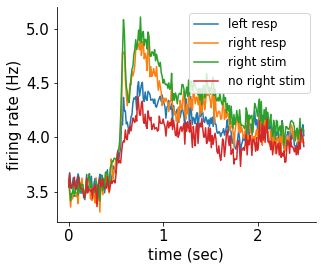

In [ ]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]

ax = plt.subplot(1,5,1)
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');

In [ ]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

In [ ]:
import pandas as pd
#df = pd.DataFrame.from_dict(alldat, orient='index').transpose()
#len(df.transpose()['pupil'][0][0])
#f#['response'][0]
alldat

array([{'spks': array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
       

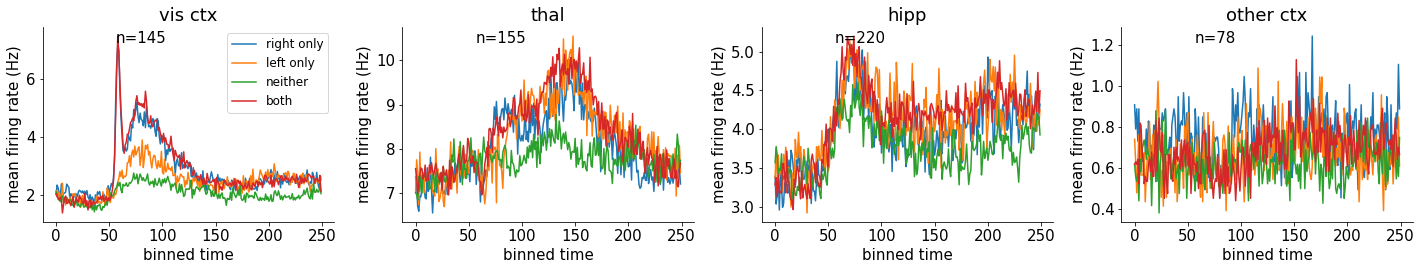

In [ ]:
#@title plots by brain region and visual conditions
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)', title = regions[j])


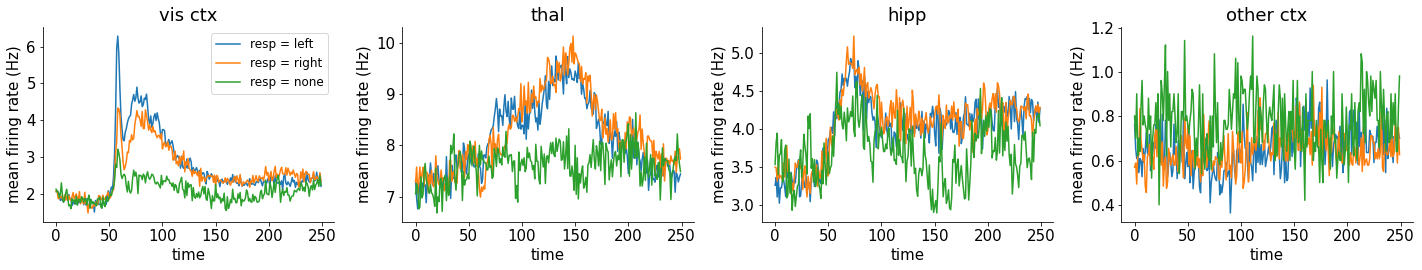

In [ ]:
#@title plots by brain region and response type
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  plt.title(regions[j])
  if np.sum(barea==j)==0:
    continue
  plt.plot(1/dt * dat['spks'][barea==j][:,response<0].mean(axis=(0,1)))  
  plt.plot(1/dt * dat['spks'][barea==j][:,response>0].mean(axis=(0,1)))
  plt.plot(1/dt * dat['spks'][barea==j][:,response==0].mean(axis=(0,1)))
 
  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=12)
  ax.set(xlabel = 'time', ylabel = 'mean firing rate (Hz)')


In [ ]:
#@title top PC directions from stimulus + response period, with projections of the entire duration
from sklearn.decomposition import PCA 

droll = np.reshape(dat['spks'][:,:,51:130], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))

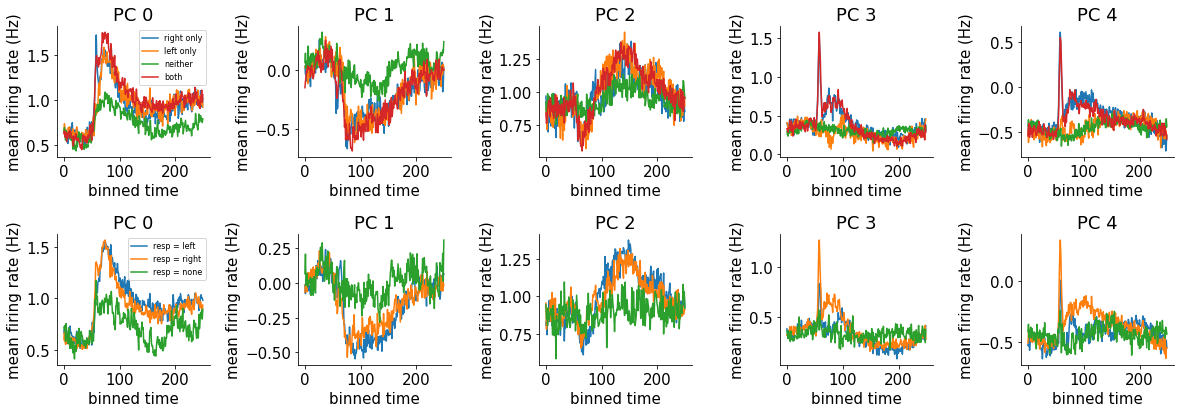

In [ ]:
#@title The top PCs capture most variance across the brain. What do they care about? 
plt.figure(figsize= (20, 6))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

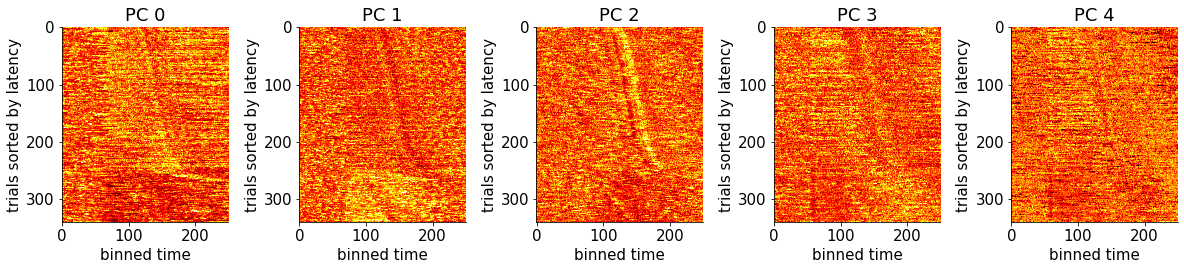

In [ ]:
#@title now sort all trials by response latency and see if the PCs care about that.
from scipy.stats import zscore

isort = np.argsort(dat['response_time'].flatten())

for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'hot')
  ax.set(xlabel = 'binned time', ylabel = 'trials sorted by latency')
  plt.title('PC %d'%j)

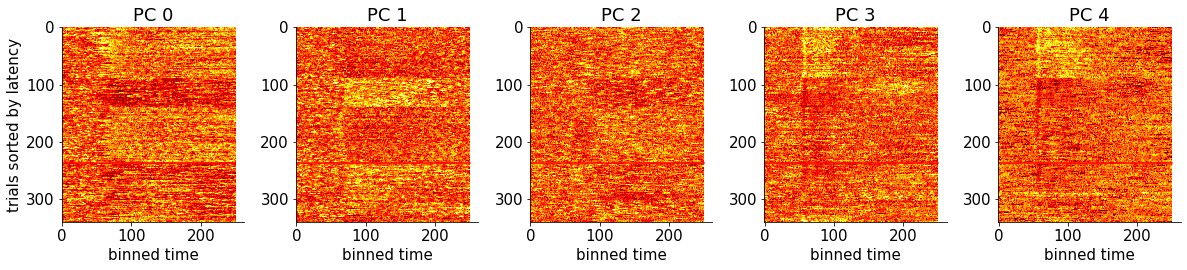

In [ ]:
#@title correct vs incorrect trials
# the following are the correct responses:
# if vis_left > vis_right : response >0
# if vis_left < vis_right : response <0
# if vis_left = vis_right : response =0
# trials below red line are incorrect
is_correct = np.sign(response)==np.sign(vis_left-vis_right)

# sort by correct, and then by response
isort = np.argsort(-is_correct.astype('float32') + response/10) 

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'hot')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')


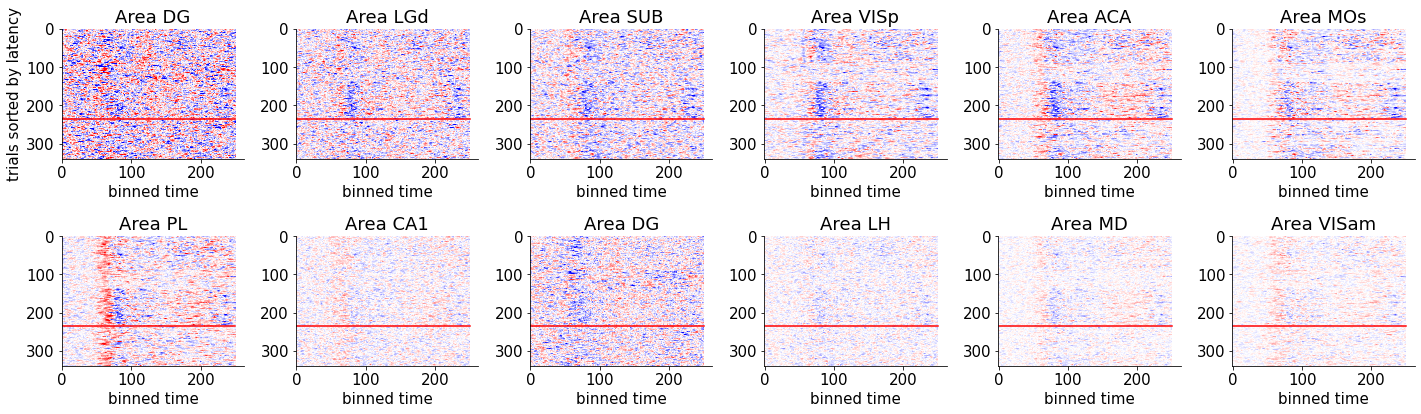

In [ ]:
# plot the LFP

is_correct = np.sign(response)==np.sign(vis_left-vis_right)
isort = np.argsort(-is_correct.astype('float32') + response/10) # sort by correct, and then by response

nwrong = np.sum(is_correct)
plt.figure(figsize=(20,6))
for j in range(len(dat['lfp'])):
  ax = plt.subplot(2,6,j+1)
  plt.imshow(dat['lfp'][j, isort], cmap = 'bwr', vmax = 50, vmin=-50, aspect='auto')
  plt.title('Area %s'%dat['brain_area_lfp'][j])
  
  plt.plot([0, NT], [nwrong, nwrong], 'r')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  


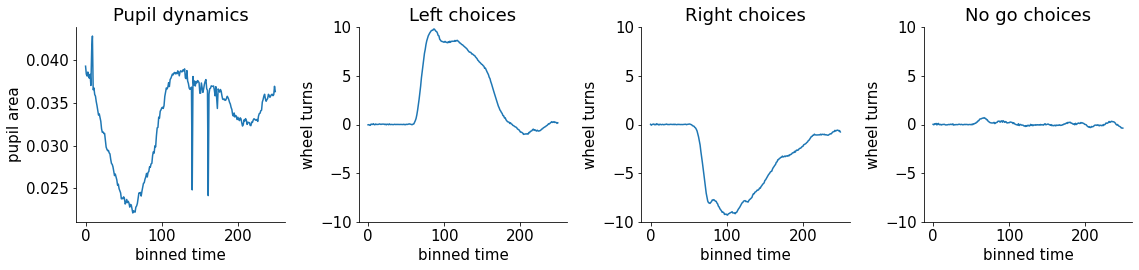

In [ ]:
# plot the behavioral data (pupil area is noisy because it's very small)

ax = plt.subplot(1,5,1)
plt.plot(dat['pupil'][0, :].mean(0));
ax.set(ylabel='pupil area', xlabel = 'binned time', title='Pupil dynamics')

yl = [-10, 10]
ax = plt.subplot(1,5,2)
plt.plot(dat['wheel'][0, response>0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Left choices');

ax = plt.subplot(1,5,3)
plt.plot(dat['wheel'][0, response<0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Right choices');

ax = plt.subplot(1,5,4)
plt.plot(dat['wheel'][0, response==0].mean(0));
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='No go choices');


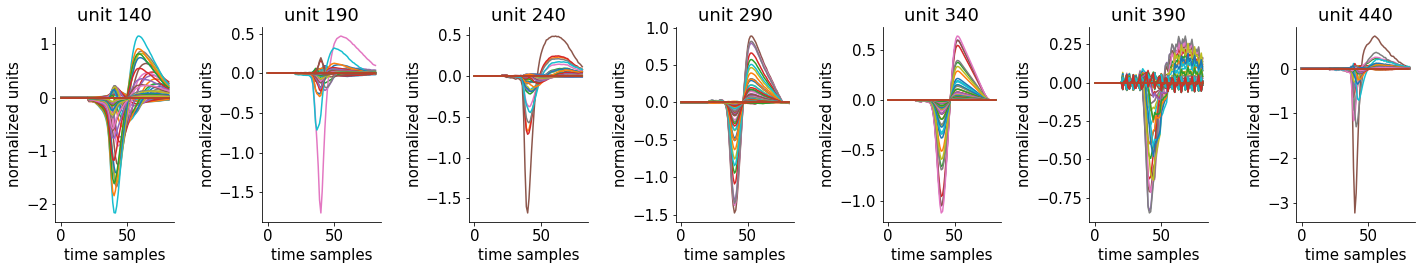

In [ ]:
# plot the spike waveforms for some neurons. Sometimes these can tell us what cell type the neuron is 
# (i.e. fast spiking interneurons have short waveforms)

for j in range(7):
  ax = plt.subplot(1,7,j+1)
  kk = 140 + j * 50
  wav = dat['waveform_w'][kk] @ dat['waveform_u'][kk]
  plt.plot(wav)
  ax.set(xlabel = 'time samples', title ='unit %d'%kk, ylabel = 'normalized units')

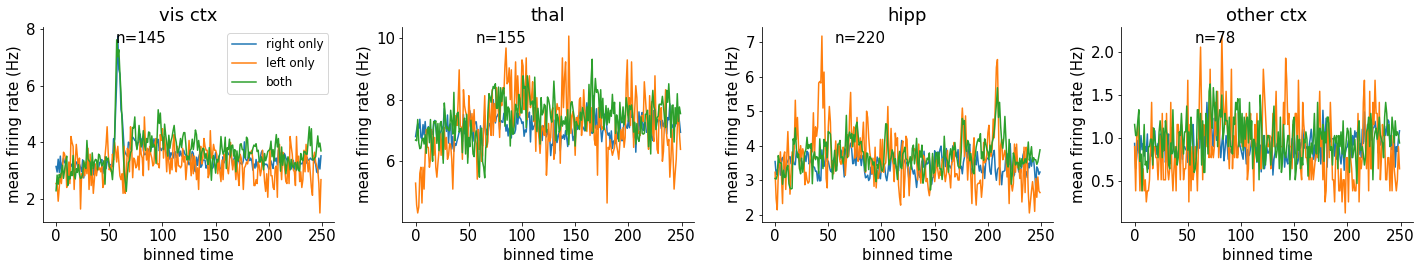

In [ ]:
# plots by brain region and visual conditions for PASSIVE trials
vis_left_p = dat['contrast_left_passive']
vis_right_p = dat['contrast_right_passive']
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  plt.title(regions[j])
  
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0, vis_right_p>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0 , vis_right_p==0)].mean(axis=(0,1)))
  #plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0 , vis_right_p==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0, vis_right_p>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')